In [27]:
import pandas as pd
from IPython.display import Image
from notebooks.library.display import toggle_input_code
#toggle_input_code()

ImportError: No module named lmfit

The metal is 20 nm aluminum. The complex conductivity is what we expect at 250 mK if only thermal quasiparticles are present.
This gives surface resistance $R_s = 3.4 \, \mu \Omega / \square$ and surface reactance $X_s = 0.030 \, \Omega / \square$.

The substrate is silicon with zero conductivity and zero loss tangent.

The simulated resonator is pictured below. It lies on a 5 micron grid, with no bends. The simulation is performed with a minimum subsection of 5 cells (5 microns) with edge meshing. Using edge meshing increases the time per frequency from about 35 minutes to 45 minutes.

Port 3 is shorted: its internal resistance is $10^{-8} \, \Omega$; previously it was $50 \, \Omega$. This is critical for the resonance extracted from the Z-parameters to match that extracted from the S-parameters.

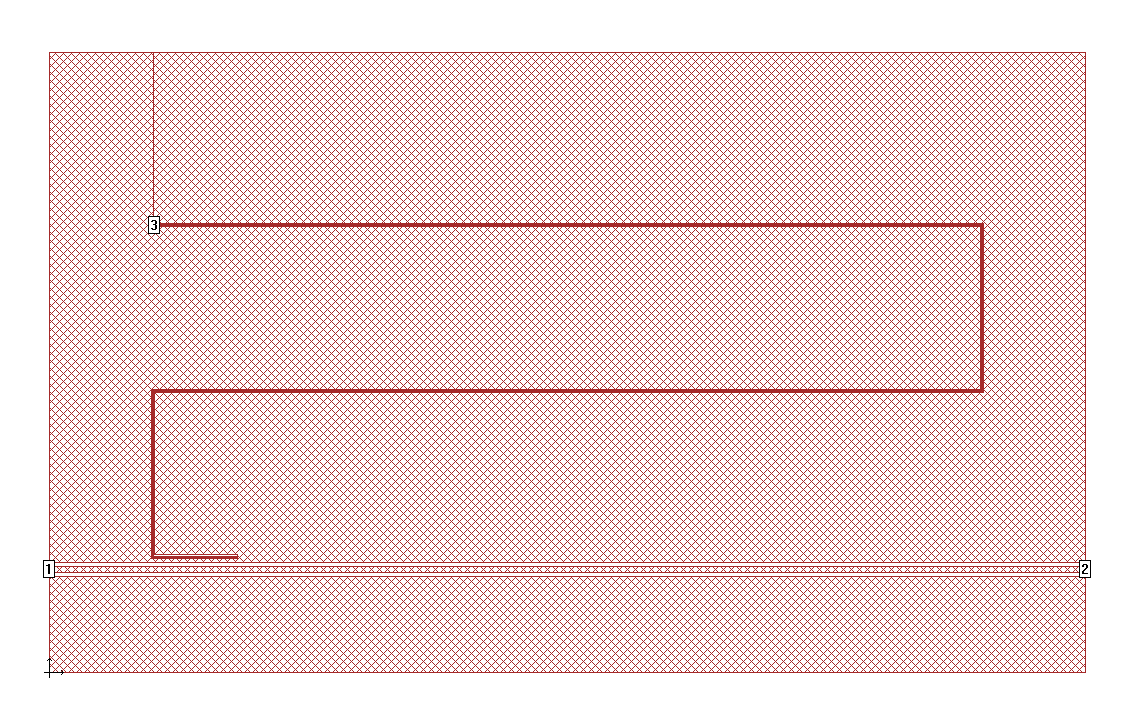

In [2]:
Image(filename='/Users/daniel/Dropbox/multichroic/one_manhattan.png') 

In [4]:
z = pd.read_csv('/Users/daniel/Dropbox/multichroic/one_manhattan_shorted_zero_0.25K_Z.csv', header=7, delimiter=',')
z.f = 1e9 * z.Frequency_GHz

In [7]:
s = pd.read_csv('/Users/daniel/Dropbox/multichroic/one_manhattan_shorted_zero_0.25K_S.csv', header=7, delimiter=',')
s.f = 1e9 * s.Frequency_GHz

In [8]:
re_poly = np.polyfit(z.f, z.REZ33, 2)
im_poly = np.polyfit(z.f, z.IMZ33, 1)

f_r = -im_poly[1] / im_poly[0]
R = np.polyval(re_poly, f_r)
Q = im_poly[0] * f_r / (2 * R)

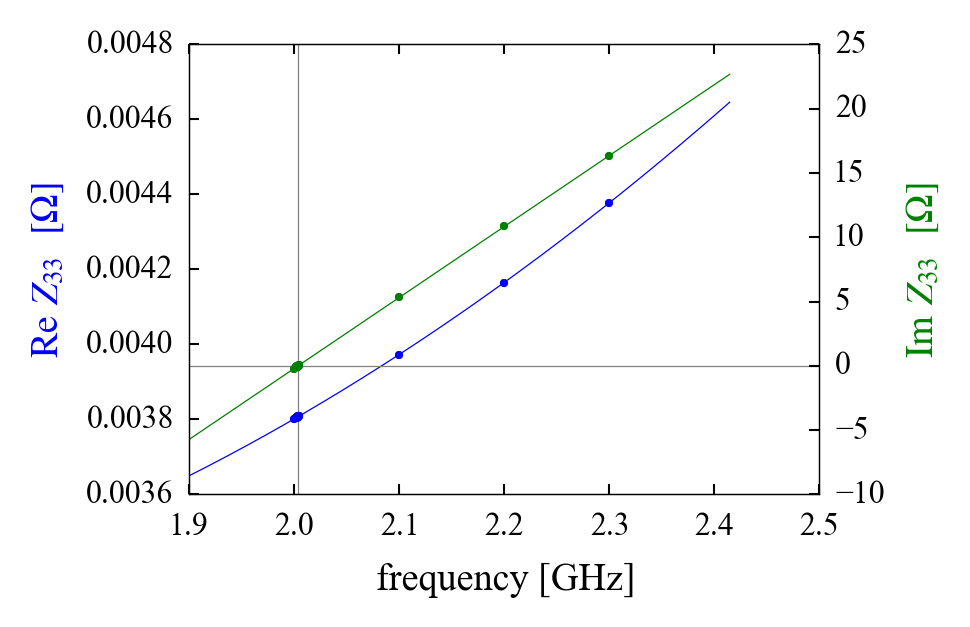

In [9]:
re_color = 'blue'
im_color = 'green'
scale = 1e-9
f_fit = np.linspace(0.95 * z.f.min(), 1.05 * z.f.max(), 1e3)
fig, re_ax = plt.subplots()
im_ax = re_ax.twinx()
im_ax.axhline(0, color='gray')
re_ax.axvline(scale * f_r, color='gray')
re_ax.plot(scale * z.f, z.REZ33, '.', color=re_color, label='re Z33')
re_ax.plot(scale * f_fit, np.polyval(re_poly, f_fit), color=re_color)
im_ax.plot(scale * z.f, z.IMZ33, '.', color=im_color, label='im Z33')
im_ax.plot(scale * f_fit, np.polyval(im_poly, f_fit), color=im_color)
re_ax.set_xlabel('frequency [GHz]')
re_ax.set_ylabel(r'$\mathrm{Re} \, Z_{33} \; [\Omega]$', color=re_color)
im_ax.set_ylabel(r'$\mathrm{Im} \, Z_{33} \; [\Omega]$', color=im_color);

As shown in the plot above, we fit a line to $\mathrm{Im} \, Z_{33}$ and a quadratic to $\mathrm{Re} \, Z_{33}$ to determine the parameters. The results are

In [10]:
print("Measured resonance f_r = {:.6f} [GHz]".format(1e-9 * f_r))
print("Quality factor Q = {:.2g}".format(Q))

Measured resonance f_r = 2.003901 [GHz]
Quality factor Q = 1.5e+04


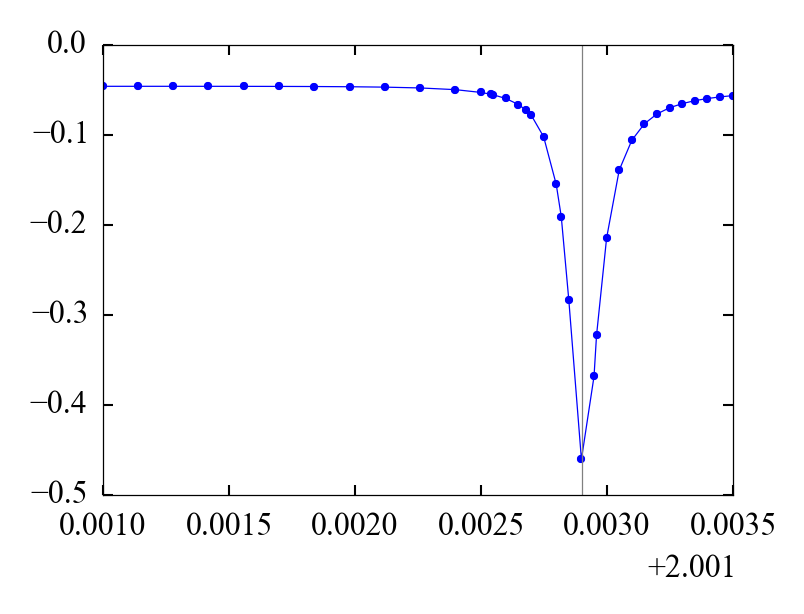

In [15]:
scale = 1e-9
fig, ax = plt.subplots()
ax.plot(scale * s.f, 20 * np.log10(np.abs(s.RES21 + 1j * s.IMS21)), '.-')
#ax.plot(scale * s.f, np.abs(s.RES31 + 1j * s.IMS31), '.')
#ax.plot(scale * s.f, np.abs(s.RES32 + 1j * s.IMS32), '.')
#ax.set_ylim(0.99, 1.0)
ax.set_xlim(2.002, 2.0045)
ax.axvline(scale * f_r, color='gray')

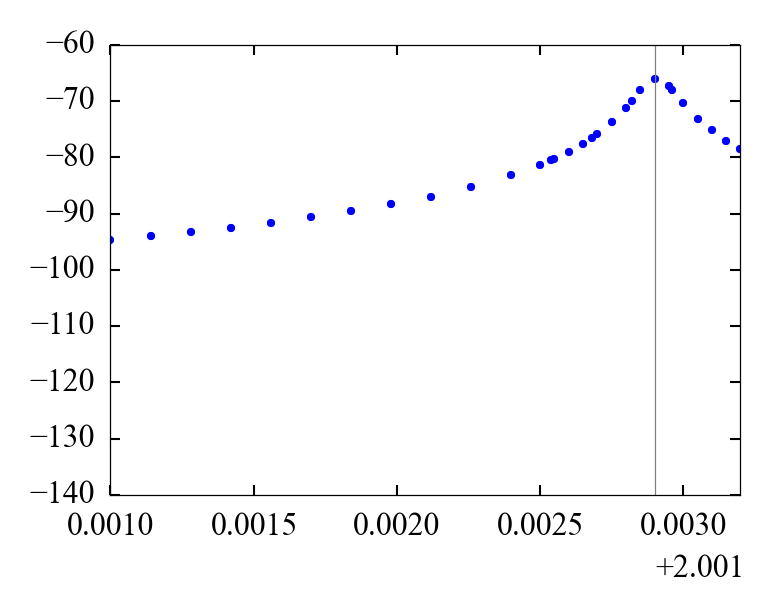

In [16]:
scale = 1e-9
fig, ax = plt.subplots()
ax.plot(scale * s.f, 20 * np.log10(np.abs(s.RES31 + 1j * s.IMS31)), '.')
#ax.plot(scale * s.f, np.abs(s.RES32 + 1j * s.IMS32), '.')
#ax.set_ylim(0.99, 1.0)
ax.set_xlim(2.002, 2.0042)
ax.axvline(scale * f_r, color='gray')

In [17]:
from scipy.constants import c
a = 10e-3
epsilon_r = 11.9
epsilon_eff = (1 + epsilon_r) / 2
v = c / epsilon_eff**(1/2)
f_0 = v / (4 * a)
print("Expected resonance f_0 = {:.3f} [GHz]".format(1e-9 * f_0))

Expected resonance f_0 = 2.951 [GHz]


In [18]:
alpha = 1 - (f_r / f_0)**2
print("kinetic inductance fraction: {:.2f}".format(alpha))

kinetic inductance fraction: 0.54


In [19]:
linewidth = f_r / Q
linewidth

138029.56630212907

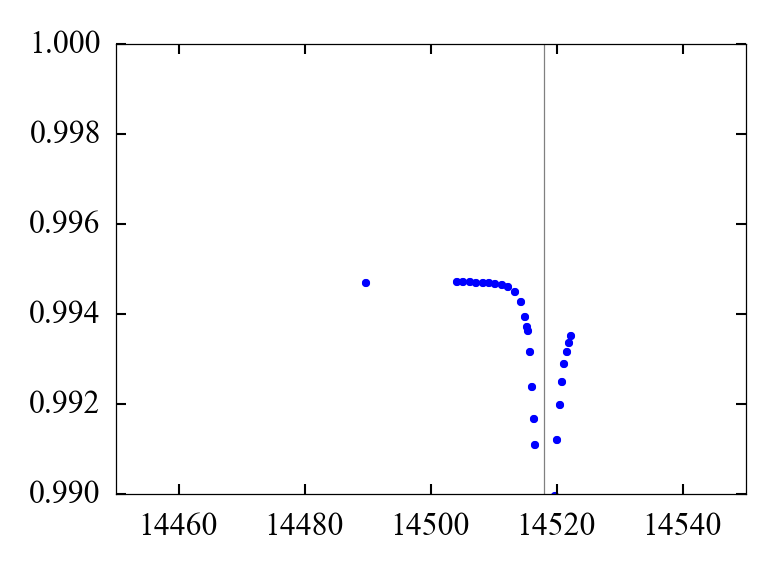

In [21]:
scale = 1 / linewidth
fig, ax = plt.subplots()
ax.plot(scale * s.f, np.abs(s.RES21 + 1j * s.IMS21), '.')
ax.set_ylim(0.99, 1.0)
ax.set_xlim(14450, 14550)
ax.axvline(scale * f_r, color='gray')

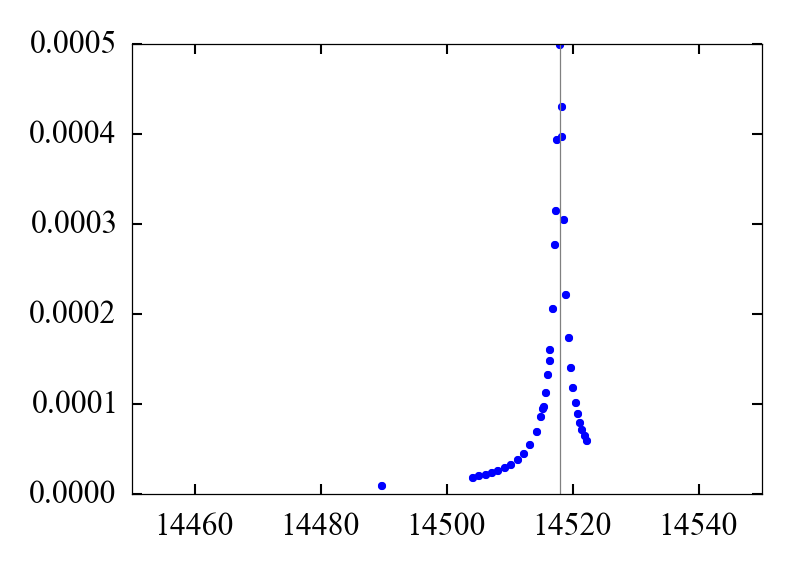

In [22]:
scale = 1 / linewidth
fig, ax = plt.subplots()
ax.plot(scale * s.f, np.abs(s.RES31 + 1j * s.IMS31), '.')
#ax.plot(scale * s.f, np.abs(s.RES32 + 1j * s.IMS32), '.')
ax.set_ylim(0, 0.0005)
ax.set_xlim(14450, 14550)
ax.axvline(scale * f_r, color='gray')